
Maximum likelihood estimation (MLE) 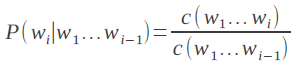 


MLE of Unigram 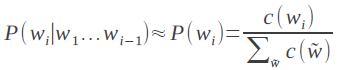


Unknow word probability 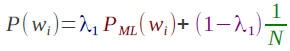


Likelihood: The probabilities of some observation data in the test set Wtest, given the model M. 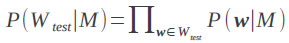
    


LogLikelihood 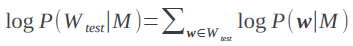


Entropy (H) is the average negative log2Likelihood per word.  Perplexity (PPL) is two to the power of per-word entropy. 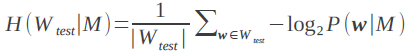
    



In [20]:
#train a Unigram model on the training data

counts = {}
total_count = 0

#load training data and count words
train_lines = open("data/wiki-en-train.txt", "r").readlines()
for line in train_lines:
    words = line.strip().split(" ")
    words.append("</s>")
    for word in words:
        if word in counts.keys():
            counts[word] += 1
        else:
            counts[word] = 1
        total_count += 1

#calculate the probability of each unique word in the training data, and save the model
model_unigram = open("data/model_unigram.txt", "w")
for word, count in counts.items():
    probability = count / total_count
    model_unigram.write(word + " " + str(probability) + "\n")


In [21]:
import math

#load model
probabilities = {}
model_unigram = open("data/model_unigram.txt", "r").readlines()
for line in model_unigram:
    w_p = line.strip().split(" ")
    probabilities[w_p[0]] = float(w_p[1])

#set parameters
lamda_1 = 0.95
lamda_unk = 1 - lamda_1
V = 1000000
word_unk = 0
W = 0
H = 0

#calculate entropy and coverage on test data
test_lines = open("data/wiki-en-test.txt", "r").readlines()
for line in test_lines:
    words = line.strip().split(" ")
    words.append("</s>")
    for word in words:
        W += 1
        P = lamda_unk / V
        if word in probabilities.keys():
            P += lamda_1 * probabilities[word]
        else:
            word_unk += 1
        H += -(math.log2(P))

print("Entropy =", H / W)
print("Coverage =", (W - word_unk) / W)

Entropy = 11.927857382884122
Coverage = 0.8248423095584667
